In [48]:
from sklearn import datasets, cross_validation
from sklearn.tree import DecisionTreeClassifier 

digits = datasets.load_digits()
X = digits.data
y = digits.target

classifier = DecisionTreeClassifier()
result1 = cross_validation.cross_val_score(classifier, X, y, cv=10).mean()

def write(task_number, result): 
    with open(f"{task_number}.ans", "w") as f:
        f.write(str(result))
        
write(1, result1)

In [51]:
from sklearn.ensemble import BaggingClassifier

baggingClassifier = BaggingClassifier(classifier, n_estimators=100)
result2 = cross_validation.cross_val_score(baggingClassifier, X, y, cv=10, n_jobs=4).mean()

write(2, result2)

In [57]:
from sklearn.ensemble import BaggingClassifier
from math import sqrt

sqrt_d = int(sqrt(X.shape[1]))

baggingClassifier = BaggingClassifier(classifier, n_estimators=100, max_features=sqrt_d)
result3 = cross_validation.cross_val_score(baggingClassifier, X, y, cv=10, n_jobs=4).mean()

write(3, result3)

In [75]:
from sklearn.ensemble import BaggingClassifier
from math import sqrt

sqrt_d = int(sqrt(X.shape[1]))

classifier = DecisionTreeClassifier(max_features=sqrt_d)
baggingClassifier = BaggingClassifier(classifier, n_estimators=100)
result4 = cross_validation.cross_val_score(baggingClassifier, X, y, cv=10, n_jobs=4).mean()

write(4, result4)

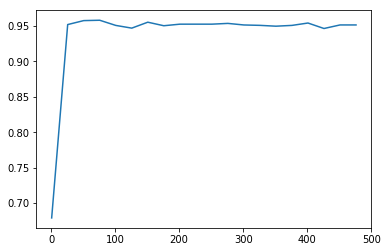

In [83]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
from matplotlib import pyplot as plt

sqrt_d = int(sqrt(X.shape[1]))

n_estimators = 100
max_features = sqrt_d
max_depth = None

def estimate(n_estimators, max_features, max_depth):
    classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)
    return cross_validation.cross_val_score(classifier, X, y, cv=10, n_jobs=4).mean()

estimators = range(1, 500, 25)
plt.plot(estimators, list(map(lambda x: estimate(n_estimators, max_features, x), estimators)))